Up until this notebook, we've used an output layer that is a probability distribution, where all of the values represent a confidence level of a given class being the correct class, and where these confidences sum to *1*.

We're now going to cover an alternate output layer option, where each neuron separately represents two classes - 0 for one the classes, and a 1 for the other. A model with this type of output is called **binary logistic regression**. this single neuron could represent two classes like *cats* vs. *dogs*, but it could also represent *cat* vs. *not cat* or any combination of 2 classes, and we could have many of these.

For example, a model may have two binary output neurons. One of these neurons could be distinguishing between *person/not person*, and the other neuron could be deciding between *indoors/outdoors*.

Binary logistic regression is a regressor type of algorithm, which will differ as we'll use a **sigmoid** activation funtion for the output layer rather than softmax, and **binary cross-entropy** rather than categorical cross-entropy for calculating loss.

# Sigmoid Activation Function

The sigmoid function is used with regressors because it "squishes" a range of outputs from negative infinity to positive infinity to be between 0 and 1. The bounds represent thw two possible classes. The sigmoid equation is:

$
\sigma_i,_j = \frac{1}{1 + e^{-x}}\
$

The denomiator of the Sigmoid function contains *e* raised to the power of *z_i,j*, where *z*, given indices, means a singular output value of the layer that this activation takes as input. The index *i* means the current sample, and the index *j* means the current output in this sample.


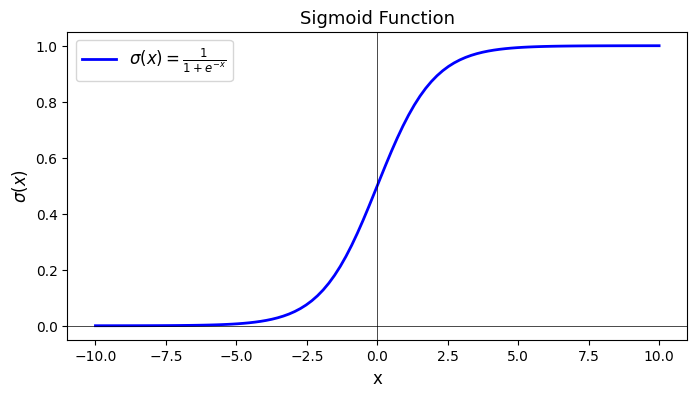

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.figure(figsize=(8,4))
plt.plot(x, y, label=r'$\sigma(x) = \frac{1}{1 + e^{-x}}$', color='blue', linewidth=2)

plt.axhline(y=0, color='black', linewidth=0.5)  # x-axis line
plt.axvline(x=0, color='black', linewidth=0.5)  # y-axis line

plt.title('Sigmoid Function', fontsize=13)
plt.xlabel('x', fontsize=12)
plt.ylabel(r'$\sigma(x)$', fontsize=12)
plt.legend(fontsize=12)

plt.show()

The sigmoid function approaches both maximum and minimum values exponentially fast. For example, for input of 2, output is ~0.8, 3 outputs ~0.95, -2 outputs -.12, -3 output ~0.05. This makes the sigmoid activation function a good candidate to apply to the final layer's output with a binary logistic regression model.

For commonly-used functions, such as the sigmoid function, the derivative are almost always public knowledge. The sigmoid function's derivative solves to

$
\sigma_i,_j(1 - \sigma_i,_j)
$

## Sigmoid Function Derivative


$$
\sigma(z) = \frac{1}{1 + e^{-z}} \Rightarrow \frac{d}{dz} \sigma(z) = \frac{d}{dz} \left( \frac{1}{1 + e^{-z}} \right)
$$

$$
= \frac{d}{dz} \left( 1 + e^{-z} \right)^{-1} = -1 \cdot \left(1 + e^{-z} \right)^{-2} \cdot \frac{d}{dz} (1 + e^{-z})
$$

$$
= -\left(1 + e^{-z} \right)^{-2} \cdot \left( 0 + (-1)e^{-z} \right) = \frac{e^{-z}}{(1 + e^{-z})^2}
$$

$$
= \left( \frac{1}{1 + e^{-z}} \right) \cdot \left( \frac{e^{-z}}{1 + e^{-z}} \right) = \sigma(z) \cdot (1 - \sigma(z))
$$


## Sigmoid Function Code

In [7]:
class Activation_Sigmoid:

    def forward(self, inputs):
        self.inputs = inputs
        self.output = 1 / (1 + np.exp(inputs))

    def backward(self, dvalues):
        self.dinputs = dvalues * (1 - self.output) * self.output

# Binary Cross-Entropy Loss

To calculate binary cross-entropy loss, we will continue to use the negative log concep from categorical cross-entropy loss. Rather than only calculating this on the target class, we will sum the log-likelihoods of the correct and incorrect classes for each neuron separately. Because class values are either 0 or 1, we can simplify the incorrect class to be *1 - correct class* as this inverts the value. We can then calculate the negative log-likehood of the correct and incorrect classes, adding them together.

$
L_i,_j = (y_i,_j)(-log(y^_i_j)) + (1 - y_i,_j)(-log(1 - y^_i,_j))
       = -y_i,_j.log(y^_i,_j) - (1 - y_i_j).log(1 - y^_i,_j)
$

Since a model can contain multiple binary outputs, and each of them, unlike in the cross-entropy loss, outputs its own prediction, loss calculated on a single output is going to be a vector of losses containing one value for each output. What we need is a sample loss and, to achieve that, we need to calculate a mean of all of these losses from a single sample.

<code>

sample_losses = np.mean(sample_losses, axis=-1)

</code>

The last parameter, `axis=-1`, informs NumPy to calculate the mean values along the last dimension. To make it easier to visualize, let's use a simple example. Assume that this is an output of the model containing 3 neurons in the output layer, and it's passed through the binary cross-entropy loss function:

In [8]:
outputs = np.array([[1, 2, 3],
                    [2, 4, 6],
                    [0, 5, 10],
                    [11, 12, 13],
                    [5, 10, 15]])


We want to take each of the output vectors, [1, 2, 3] for example, and calculate a mean value from the numbers they hold, putting the result on the output vector. We then want to repeat this for the other vectors and return the resulting vector, which will ne a one-dimensional array:

In [9]:
np.mean(outputs, axis=-1)

array([ 2.,  4.,  5., 12., 10.])

We are also going to inherit from the **Loss** class, so the overall loss calculation will be handled by the `calculate` method that we already created for the categorical cross-entropy loss class.

## Binary Cross-Entropy Loss Derivative

## Binary Cross-Entropy Code

In our code, it looks like:

In [ ]:
dvalues = outputs

samples = len(dvalues)

# Number of outputs in every sample
# We'll use the first sample to count them
outputs = len(dvalues[0])

# Calculate gradient
self.dinputs = -(y_true / clippe_dvalues - \
                 (1 - y_true) / (1 - clipped_dvalues)) / outputs


Similar to what we did in the categorical cross-entropy loss, we need to normalize gradient so it'll become invariant to the number of samples we calculate it for:


In [ ]:
self.dinputs = self.dinputs / samples

Finally, we need to addres the numerial instability of the logarithmic function. The sigmoid activation can return a value in the range of *0* and *1* (inclusive), but the `log(0)` presents sligth issue due to how it's calculated and will return *negative infinity*. This along isn't necessarily a big deal, but any list with *-inf* in it will have a mean of *-inf*, which is the same for any list with positive infinity averaging to infinity.

In [11]:
np.log(0)

C:\Users\linho\AppData\Local\Temp\ipykernel_13908\1608527138.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


np.float64(-inf)

In [12]:
print(np.mean([5, 2, 4, np.log(0)]))

-inf


C:\Users\linho\AppData\Local\Temp\ipykernel_13908\2510640258.py:1: RuntimeWarning: divide by zero encountered in log
  print(np.mean([5, 2, 4, np.log(0)]))


This is similar issue to the one we discussed earlier regarding categorical cross-entropy loss. To prevent this issue, we'll add clipping on the batch of values:

In [ ]:
y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

# We use this for the forward pass as well
sample_losses = -(y_true * np.log(y_pred_clipped) + \
                  (1 - y_true) * np.log(1 - y_pred_clipped))

As we perform the division operation durint the derivative calculation, the gradient passed in may contain both values, *0* and *1*. Either of these values will cause a problem in either the `y_true / dvalues` or `(1 - y_true) / (1 - dvalues)` parts respectively (*0* in the first and *1-1=0* in the second case will also cause division by *0*, so need to clip this gradient as well:

In [17]:
clipped_dvalues = np.clip(dvalues, 1e-7, 1 - 1e-7)

np.float64(0.9999999)

In [ ]:
class Lost_BinaryCrossentropy(Loss):

    def forward(self, y_pred, y_true):

        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        sample_losses = -(y_true * np.log(y_pred_clipped) + \
                          (1 - y_true) * np.log(1 - y_pred_clipped))
        sample_losses = np.mean(sample_losses, axis=-1)

        return sample_losses

    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        outputs = len(dvalues[0])

        clipped_dvalues = np.clip(dvalues, 1e-7, 1 - 1e-7)

        self.dinputs = -(y_true / clipped_dvalues - \
                         (1 - y_true) / (1 - clipped_dvalues)) / outputs
        self.dinputs = self.dinputs / samples

# Implementing Binary Logistic Regression and Binary Cross-Entropy Loss

With these new classes, our code changes will be in the executtion of actual code (instead of modifying the classes). The first is to make the `spiral_data` object output 2 classes, rather than 3:


In [19]:
import nnfs
from nnfs.datasets import spiral_data

In [20]:
X, y = spiral_data(samples=100, classes=2)


Next. we'll reshape our labels, as they're not sparse anymore. They're binary, *0* or *1*:

In [23]:
# reshape labels to be a list of lists
# inner list contains one output (either 0 or 1)
# per each output neuron, 1 in this case
y = y.reshape(-1, 1)
print(y[:10])

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


Why have we done this? initially, with the softmax classifier, the values from the `spiral_data` could be used directly as the target labels, as they contain the correct class labels in the numerical form -- an index of the correct class, where each neuron in the output layer is a separate class, for example [0, 1, 1, 0, 1]. In this case, however, we're trying to represent some binary outputs, where each neurons represents 2 possible classes on its own. For the example we're currently working on, we have single output neuron so the output from our neural network should be a tensor (array), containing one value, of a target value of either *0* or *1*, for example [[0], [1], [1], [0], [1]].

The `.reshape(-1, 1)` means to reshape the data into 2 dimensions, where the second dimension contains single element, and the first dimension contains how many elements the result will contain (-1) following other conditions. We are allowed to use -1 only once in a shape with NumPy, letting us have that dimension be variable. Thanks to this ability, we do not always need the same number of samples every time, and NumPY can handle the calculation for us. In the case above, they're all *-* because the `spiral_data` function makes the dataset one class at a time, starting with 0. We will also need to reshape the y-testing data in the same way.

<code>

X, y = spiral_data(100, 2)

y = y.reshape(-1, 1)

dense1 = Layer_Dense(2, 64, weight_regularizer_l2=5e-4,
bias_regularizer_l2=5e-4)

activation1 = Activation_ReLU()


dense2 = Layer_Dense(64, 1)

activation2 = Activation_Sigmoid()

</code>

We're still going to use the **Rectified Linear Activation** for the hidden layer. The hidden layer activation functions don't necessarily need to change, even though we're effectively building a different type of classifier. Notice that because this is now a binary classifier, the `dense2` object has only 1 output. Its output represents exactly 2 classes (0 or 1) being mapped to one neuron. We can now select a loss function and optimizer. For the **Adam** optimizer settings, we are going to use the default learning rate and the dacaying of 5e-7.

<code>

loss_function = Loss_BinaryCrossentropy()

optimizer = Optimizer_Adam(decay=5e-7)

</code>

Whie we require a different calculation for loss (since we use a differnt activation function for the output layer), we can still use the same optimizer as in the softmax classifier. Another small change is how we measure predictions. With probability distributions, we use `argmax` and determine which index is associated with the largest value, which becomes the classification result. With a binary classifier, we are determining if the output is closer to 0 or to 1. To do this, we simplify the output to:

<code>

predictions = (activation2.output > 0.5) * 1

</code>

This results in *True/False* evaluations to the statement that the output is above 0.5 for all values. *True* and *False*, when treated as numbers, are 1 and 0, respectively. For example, if we execute `int(True)`, the result will be 1. If we want to convert a list of True/False boolean values to numbers, we can't just wrap the list in `int()`. However, we can perform math operations directly on an array of boolean values and return the arithmetic aanswer.



In [24]:
a = np.array([True, False, True])
a

array([ True, False,  True])

In [25]:
b = a*1
b

array([1, 0, 1])

Thus, to evaluete predictive accuracy, we can:

<code>

predictions = (activation2.output > 0.5) * 1
accuracy = np.mean(predictions==y_test)

</code>

The `* 1* multiplication turns an array of boolean True/False values into numerical 1/0 values, respectively. We will need to implement this accuracy calculation for validation data too.

# Full code up to this point

In [27]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

In [36]:
class Layer_Dense:

    def __init__(self, n_inputs, n_neurons,
                 weight_regularizer_l1=0,
                 weight_regularizer_l2=0,
                 bias_regularizer_l1=0,
                 bias_regularizer_l2=0):
        self.weights = np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        self.weight_regularizer_l1 = weight_regularizer_l1
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l1 = bias_regularizer_l1
        self.bias_regularizer_l2 = bias_regularizer_l2

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.dot(inputs, self.weights) + self.biases

    def backward(self, dvalues):

        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues,
                              axis=0,
                              keepdims=True)

        if self.weight_regularizer_l1 > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dL1

        if self.weight_regularizer_l2 > 0:
            self.dweights += 2 * self.weight_regularizer_l2 * self.weights

        if self.bias_regularizer_l1 > 0:
            dL1 = np.ones_like(self.biases)
            dL1[self.biases < 0] = -1
            self.dbiases += self.bias_regularizer_l1 * dL1

        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2 * self.bias_regularizer_l2 * self.biases

        self.dinputs = np.dot(dvalues, self.weights.T)

In [37]:
print(np.random.rand(3, 3)
      )

[[0.22308163 0.95274901 0.44712538]
 [0.84640867 0.69947928 0.29743695]
 [0.81379782 0.39650574 0.8811032 ]]


In [38]:
print(np.zeros((1, 3)))

[[0. 0. 0.]]


In [39]:
class Layer_Dropout:

    def __init__(self, rate):
        self.rate = 1 - rate

    def forward(self, inputs):
        self.inputs = inputs
        self.binary_mask = np.random.binomial(1,
                                              self.rate,
                                              size=inputs.shape) / \
                           self.rate
        self.output = inputs * self.binary_mask

    def backward(self, dvalues):
        self.dinputs = dvalues * self.binary_mask

In [45]:
print(np.random.binomial(1, 0.5, size=(3, 3)))

[[1 1 0]
 [0 1 0]
 [1 1 1]]


In [46]:
class Activation_ReLU:

    def forward(self, inputs):
        self.inputs = inputs
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0

In [47]:
class Activation_Softmax:

    def forward(self, inputs):
        self.inputs = inputs
        exp_values = np.exp(inputs - np.max(inputs,
                                            axis=1,
                                            keepdims=True))
        probabilities = exp_values / np.sum(exp_values,
                                             axis=1,
                                             keepdims=True)
        self.output = probabilities

    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues)

        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            single_output = single_output.reshape(-1, 1)
            jacobian_matrix = np.diagflat(single_output) - \
                                np.dot(single_output, single_output.T)
            self.dinputs[index] = np.dot(jacobian_matrix,
                                         single_dvalues)

In [76]:
class Activation_Sigmoid:

    def forward(self, inputs):
        self.inputs = inputs
        self.output = 1 / (1 + np.exp(-inputs))

    def backward(self, dvalues):
        self.dinputs = dvalues * (1 - self.output) * self.output

In [77]:
class Optimizer_SGD:

    def __init__(self,
                 learning_rate=1.,
                 decay=0.,
                 momentum=0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                                         (1. / (1. + self.decay + self.iterations))

    def update_params(self, layer):

        if self.momentum:

            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)

            weight_updates = self.momentum * layer.weight_momentums - \
                self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates

            bias_updates = self.momentum * layer.bias_momentums - \
                self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates

        else:
            weight_updates = -self.current_learning_rate * \
                            layer.dweights
            bias_updates = -self.current_learning_rate * \
                            layer.dbiases

        layer.weights += weight_updates
        layer.biases += bias_updates

    def post_update_params(self):
        self.iterations += 1

In [78]:
class Optimizer_Adagrad:

    def __init__(self,
                 learning_rate=1.,
                 decay=0,
                 epsilon=1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon

    def pre_update_params(self):
        if self.decay:
            self.current_learining_rate = self.learning_rate * \
                                          (1. / (1. + self.decay * self.iterations))

    def update_params(self, layer):

        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        layer.weight_cache += layer.dweights ** 2
        layer.bias_cache += layer.dbiases ** 2

        layer.weights += -self.current_learning_rate * \
                            layer.dweights / \
                         (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * \
                        layer.dbiases / \
                        (np.sqrt(layer.bias_cache) + self.epsilon)

    def post_update_params(self):
        self.iterations += 1


In [79]:
class Optimizer_RMSProp:

    def __init__(self,
                 learning_rate=0.001,
                 decay=0.,
                 epsilon=1e-7,
                 rho=0.9):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.rho = rho

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                                         (1. / (1. + self.decay * self.iterations))

    def update_params(self, layer):

        if not hasattr(layer, "weight_cache"):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)

        layer.weight_cache = self.rho * layer.weight_cache + \
                             (1 - self.rho) * layer.dweights**2
        layer.bias_cache = self.rho * layer.bias_cache + \
                           (1 - self.rho) * layer.dbiases**2

        layer.weights += -self.current_learning_rate * layer.dweights / \
                         (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * layer.dbiases / \
                        (np.sqrt(layer.bias_cache) + self.epsilon)

    def post_update_params(self):
        self.iterations += 1


In [104]:
class Optimizer_Adam:

    def __init__(self,
                 learning_rate=0.01,
                 decay=0.,
                 epsilon=1e-7,
                 beta_1=0.9,
                 beta_2=0.999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.epsilon = epsilon
        self.iterations = 0
        self.beta_1 = beta_1
        self.beta_2 = beta_2

    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * \
                                         (1. / (1. + self.decay * self.iterations))

    def update_params(self, layer):

        if not hasattr(layer, 'weight_momentums'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)
            layer.bias_momentums = np.zeros_like(layer.biases)

        layer.weight_momentums = self.beta_1 * layer.weight_momentums + \
                                 (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + \
                               (1 - self.beta_1) * layer.dbiases

        weight_momentums_corrected = layer.weight_momentums / \
                                     (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / \
                                   (1 - self.beta_1 ** (self.iterations + 1))

        layer.weight_cache = self.beta_2 * layer.weight_cache + \
                             (1 - self.beta_2) * layer.dweights ** 2
        layer.bias_cache = self.beta_2 * layer.bias_cache + \
                           (1 - self.beta_2) * layer.dbiases ** 2

        weight_cache_corrected = layer.weight_cache / \
                                 (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / \
                               (1 - self.beta_2 ** (self.iterations + 1))

        layer.weights += -self.current_learning_rate * \
                            weight_momentums_corrected / \
                         (np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.biases += -self.current_learning_rate * \
                        bias_momentums_corrected / \
                        (np.sqrt(bias_cache_corrected) + self.epsilon)

    def post_update_params(self):
        self.iterations += 1

In [81]:
class Loss:

    def regularization_loss(self, layer):

        regularization_loss = 0

        if layer.weight_regularizer_l1 > 0:
            regularization_loss += layer.weight_regularizer_l1 * \
                                    np.sum(np.abs(layer.weights))

        if layer.weight_regularizer_l2 > 0:
            regularization_loss += layer.weight_regularizer_l2 * \
                                    np.sum(layer.weights * layer.weights)

        if layer.bias_regularizer_l1 > 0:
            regularization_loss += layer.bias_regularizer_l1 * \
                                    np.sum(np.abs(layer.biases))

        if layer.bias_regularizer_l2 > 0:
            regularization_loss += layer.bias_regularizer_l2 * \
                                    np.sum(layer.biases * layer.biases)

        return regularization_loss

    def calculate(self, output, y):

        sample_losses = self.forward(output, y)

        data_loss = np.mean(sample_losses)

        return data_loss


In [101]:
class Loss_CategoricalCrossentropy(Loss):

    def forward(self, y_pred, y_true):

        samples = len(y_pred)

        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[
                range(samples),
                y_true
            ]

        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(
                y_pred_clipped * y_true,
                axis=1
            )

        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    def backward(self, dvalues, y_true):

        samples = len(dvalues)

        labels = len(dvalues[0])

        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]

        self.dinputs = -y_true / dvalues
        self.dinputs = self.dinputs / samples


In [102]:
class Activation_Softmax_Loss_CategoricalCrossentropy:

    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    def forward(self, inputs, y_true):
        self.activation.forward(inputs)
        self.output = self.activation.output

        return self.loss.calculate(self.output, y_true)

    def backward(self, dvalues, y_true):
        samples = len(dvalues)

        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)

        self.dinputs = dvalues.copy()

        self.dinputs[range(samples), y_true] -= 1
        self.dinputs = self.dinputs / samples


In [103]:
class Loss_BinaryCrossentropy(Loss):

    def forward(self, y_pred, y_true):

        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)

        sample_losses = -(y_true * np.log(y_pred_clipped) + \
                          (1 - y_true) * np.log(1 - y_pred_clipped))

        sample_losses = np.mean(sample_losses, axis=-1)

        return sample_losses

    def backward(self, dvalues, y_true):

        samples = len(dvalues)

        outputs = len(dvalues[0])

        clipped_dvalues = np.clip(dvalues, 1e-7, 1 - 1e-7)

        self.dinputs = -(y_true / clipped_dvalues - \
                         (1 - y_true) / (1 - clipped_dvalues)) / outputs

        self.dinputs = self.dinputs / samples

In [105]:
X, y = spiral_data(samples=1000, classes=2)

# Reshape labels to be a list of lists
# Inner list contains aone output (either 0 or 1)
# per each output neuron, 1 in this case
y = y.reshape(-1, 1)

dense1 = Layer_Dense(2, 64,
                     weight_regularizer_l2=1e-4,
                     bias_regularizer_l2=1e-4)

activation1 = Activation_ReLU()

dense2 = Layer_Dense(64, 1)

activation2 = Activation_Sigmoid()

loss_function = Loss_BinaryCrossentropy()

optimizer = Optimizer_Adam(decay=5e-7)

for epoch in range(10001):

    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)

    data_loss = loss_function.calculate(activation2.output, y)

    regularization_loss = \
        loss_function.regularization_loss(dense1) + \
        loss_function.regularization_loss(dense2)

    loss = data_loss + regularization_loss

    predictions = (activation2.output > 0.5) * 1
    accuracy = np.mean(predictions==y)

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'data_loss: {data_loss:.3f}, ' +
              f'reg_loss: {regularization_loss:.3f}, ' +
              f'lr: {optimizer.current_learning_rate}')

    loss_function.backward(activation2.output, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()

epoch: 0, acc: 0.500, data_loss: 1.863, reg_loss: 0.013, lr: 0.01
epoch: 100, acc: 0.622, data_loss: 0.646, reg_loss: 0.012, lr: 0.009999505024501287
epoch: 200, acc: 0.619, data_loss: 0.630, reg_loss: 0.011, lr: 0.009999005098992651
epoch: 300, acc: 0.678, data_loss: 0.595, reg_loss: 0.011, lr: 0.009998505223469092
epoch: 400, acc: 0.733, data_loss: 0.548, reg_loss: 0.013, lr: 0.009998005397923115
epoch: 500, acc: 0.847, data_loss: 0.468, reg_loss: 0.017, lr: 0.009997505622347224
epoch: 600, acc: 0.865, data_loss: 0.397, reg_loss: 0.023, lr: 0.00999700589673393
epoch: 700, acc: 0.872, data_loss: 0.344, reg_loss: 0.030, lr: 0.009996506221075735
epoch: 800, acc: 0.878, data_loss: 0.308, reg_loss: 0.035, lr: 0.00999600659536515
epoch: 900, acc: 0.896, data_loss: 0.279, reg_loss: 0.040, lr: 0.009995507019594693
epoch: 1000, acc: 0.899, data_loss: 0.261, reg_loss: 0.043, lr: 0.009995007493756867
epoch: 1100, acc: 0.902, data_loss: 0.249, reg_loss: 0.044, lr: 0.009994508017844196
epoch: 120

In [109]:
X_test, y_test = spiral_data(samples=1000, classes=2)

y_test = y_test.reshape(-1, 1)

dense1.forward(X_test)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

loss = loss_function.calculate(activation2.output, y_test)

predictions = (activation2.output > 0.5) * 1
accuracy = np.mean(predictions==y_test)

print(f'validation, acc: {accuracy:.3f}. loss: {loss:.3f}')

validation, acc: 0.971. loss: 0.089
